https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

# Introduction

- **Deep Learning** one of the machine learning technique that learns featurres directly from data. </br>

- **Why deep Learning** When the amount of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy

- **art amount of big**It is hard to answer but intuitively 1 million sample is enough to say "big amounth of data"
- **Usage fields of deep learning** Speech recognition, image classification, natural language procession (nlp) or recommendation systems
- **What is difference of deep learning from machine learning**:<br>
-- Machine learning covers deep learning. <br>
-- Features are given machine learning manually.
     On the other hand, deep learning learns features directly from data

![Machine_learning](datas/ml_deep.png "Title")

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#from subprocess import check_output
#print(check_output("ls", "datas/")).decode("utf8")
# For Linux

#### Load the dataset

In [2]:
x_1 = np.load("datas/X.npy")
y_1 = np.load("datas/Y.npy")

In [3]:
x_1.shape

(2062, 64, 64)

In [4]:
y_1.shape

(2062, 10)

In [5]:
y_1[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

(-0.5, 63.5, 63.5, -0.5)

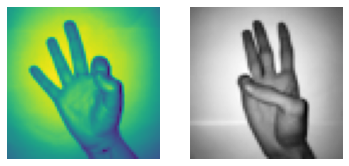

In [6]:
image_size = 64
plt.subplot(1,2,1)
plt.imshow(x_1[2].reshape(image_size, image_size))
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(x_1[810], "gray") # Will print  in gray
plt.axis("off")

In [7]:
# Join a sequence of arrays along an row axis
X = np.concatenate((x_1[204:409],x_1[822:1027]), axis = 0)
# from 0 to 204 is zero sign and from 205 to 410 is one sign

z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z,o), axis = 0).reshape(X.shape[0],1)

print("X shape", X.shape)
print("y shape", Y.shape)

X shape (410, 64, 64)
y shape (410, 1)


In [8]:
# The shape of the x is (410, 64,64)
# 410 means that we have 410 images (zero and one signs)
# 64 means that our image size is 64x 64 (64 x 64 pixel)

# The shape of the Y is 410,1 means 410 labels 0 and 1

# Lets split X and Y into train and test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]


Now we have 3 dimensional input array X so we need to make it flatten 2D in order to use as input for our first deep learning model. <br>
-- Our label array y is already flatten 2D so we leave <br>
-- Lets flatten X array (images array)

In [10]:
print(x_train.shape)
print(y_train.shape)
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1]*x_train.shape[2])
x_test_flatten  = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])

print(x_train_flatten.shape)
print(x_test_flatten.shape)

(348, 64, 64)
(348, 1)
(348, 4096)
(62, 4096)


In [11]:
# https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners/data
# As we can see, We have 348 images and each image has 4096 pixels in image train array.
# also we have 62 images and each image has 4096 pixels in image test array.

# take Transpose

In [12]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_train = y_train.T
y_test = y_test.T

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4096, 348) (4096, 62) (1, 348) (1, 62)


In [13]:
# We can see the size is changed

#### Logistic Regression
- Binary Classification ( 0 and 1 )
- Computation graphs are a nice way to think about mathmatical expressions <br>
- It is like visualization of mathematical expressions


- binary classification

Paramerers are Weight and bias <br>
Weights coeffiecients of each pixels <br>
Bias: intercept <br>
z = (W.t) X + b <br>

In [19]:
# Short description and example of definition 
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)
print(result)

# Lets initiallize parameters 
# so what we need is dimension  4096 that is number of pizels as a parameter for out initialize method (def)

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
initialize_weights_and_bias(5)

8


(array([[0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01]]),
 0.0)

#### Forward Propagation 


In [20]:
# Calculation of z
# z = np.dot(w.T, x_train)+b  # dot matrix multiplication

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [25]:
sigmoid(100)
y_head = sigmoid(0)

In [27]:
# What is Loss (error) Function
# Forward propagation Steps
# Find z = w.T *x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)

def forward_propagation(w,b,x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z) # Probabilistic 0-1
    loss = -y_train * np.log(y_head)- (1-y_train) * np.log(1 - y_head)
    cost = (np.sum(loss))/ x_train.shape[1] # x_train shape[1] is for scaling
    
    return cost

#### Optimization Algorithm with Gradient Descent

In [28]:
# Well, now we know what is our cost that is error
# Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction
# Lets think first step, every thing starts with initializing weights and bias. Therefore xose is dependent with them
# In other words, our model needs to learn  the parameters weights and bias that minimize cost function.
# This technique is called gradient descent.


In [29]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation

def forward_backward_propagation(w,b,x_train, y_train):
    # Forward Propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train* np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1] # x_train.shape[1] is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T)))/ x_train.shape[1]
    derivative_bias   = np.sum(y_head - y_train)
    # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

In [30]:
## Up to this Point we learn
 # Initializing parameters (implemented)
 # Finding Cost with forward propagation and cost Function ( implemented)
 # Updating (learning) parameters (weight and bias). Now lets implement it

In [35]:
# Updating (learning) parameters

def update (w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating(learning parameters) is number_of_iteration times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w,b,x_train, y_train)
        cost_list.append(cost)
        
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f"%(i,cost))
            
        # We update (learn) parameters weights and bias
        parameters = {"weight": w, "bias":b}
        plt.plot(index, cost_list2)
        plt.xticks(index, rotation = "vertical")
        plt.xlabel("Number of Iteration")
        plt.ylabel("Cost")
        plt.show()
        return parameters, gradients, cost_list

Cost after iteration 0: 14.014222


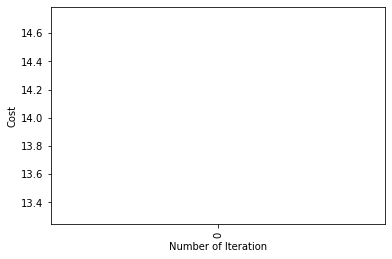

In [36]:
 w,b = initialize_weights_and_bias(4096)
parameters, gradients, cost_list = update(w,b, x_train, y_train, learning_rate=0.09, number_of_iteration= 200)

In [37]:
# Upto this point we learn our parameters. It means we fit the data.
# In order to predict we have parameters. Therefore, lets predict
# In prediction step we have x_test as a input and while using it, we make forward prediction

In [38]:
# Prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+ b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    # if z is bigger thatn 0.5, Our Prediction is sign one (y_head = 1)
    # If z is smaller than 0.5, Our prediction is sign zero (y_head= 0)
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction
# predict(parameters["weight"], parameters["bias"], x_test)

Cost after iteration 0: 14.014222


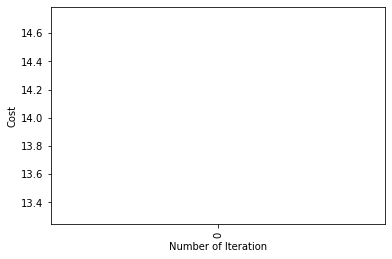

train accuracy : 50.57471264367816%
test Accuracy: 46.7741935483871%


In [41]:
## We make Prediction
# now lets put them all together

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize 
    dimension = x_train.shape[0]
    # that is 4096
    
    # donot change learning rate
    parameters, gradients, cost_list = update(w,b, x_train, y_train, learning_rate,
                                             num_iterations)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
    
    # Print train / test Errors
    print("train accuracy : {}%".format(100-np.mean(np.abs(y_prediction_train - y_train))*100))
    print("test Accuracy: {}%".format(100 - np.mean(np.abs(y_prediction_test- y_test))*100))
    
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01,
                       num_iterations=150)